In [1]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [9]:
import shutil
shutil.unpack_archive("train.tar.gz")

In [67]:
import os
from xml.etree import ElementTree
from tqdm.notebook import tqdm
import collections
import seaborn as sns
import cv2
import matplotlib.pyplot as plt
import random

In [ ]:
cd train

<h1>1. Exploratory Data Analysis </h1>


<h3> For this road damage detection problem following categories is considered {D00: Longitudinal Crack, D10: Transverse Crack, D20: Aligator Crack, D40: Pothole} </h3>

<h2> 1.1 Damage types analysis for multiple countries </h2>

<h3> 1.1.1 Road Damage Analysis for India </h3>

In [118]:


india_filenames = [file for file in os.listdir(os.getcwd() + '/India/annotations/xmls')]
# code for getting count of damages in given Indian dataset from xml files
damage_count_india = []
for file in tqdm(india_filenames):
  xmlfile = open(base + '/India/annotations/xmls/' + file)
  tree = ElementTree.parse(xmlfile)
  root = tree.getroot()
  for ob in root.iter('object'):
    damagetype = ob.find('name').text
    damage_count_india.append(damagetype)


<h4> 1.1.1.1  Total count of files and damages  for India </h4>

In [119]:
print('Image files for India',len(india_filenames))
print('Total count of damage for India',len(damage_count_india))

Image files for India 7706
Total count of damage for India 8203


<h4> 1.1.2.1  Bar plots for analysing distribution of damage types for India </h4>

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


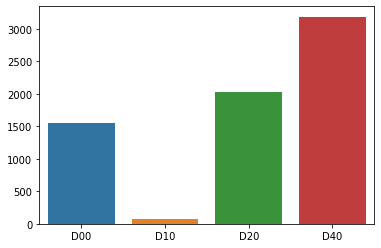

In [18]:
india_damage_counts = collections.Counter(damage_count_india)
damage_types = ['D00','D10','D20','D40'] # damage types to be considered for this problem
final_damage_counts = []


for damage in damage_types:
  final_damage_counts.append(india_damage_counts[damage])
sns.barplot(damage_types,final_damage_counts)

<h2> Observations </h2>
<ol>
<li> From the above plot, most of the roads damages in India are of D40 category i.e potholes.</li>
<li> Followed by D20 category i.e Alligator crack and D00 category i.e Longitudinal Crack </li>
<li> And D10  damage category i.e transverse crack are very less in Indian images. so this can cause some issues while evaluating performance on test data which contains D10 damage type when considered only indian images as train data.</li>

<h3> 1.1.2 Road Damage Analysis for Japan </h3>

In [20]:


japan_filenames = [file for file in os.listdir(os.getcwd() + '/Japan/annotations/xmls')]
# code for getting count of damages in given Japan dataset from xml files
japan_damage_count = []
for file in tqdm(japan_filenames):
  xmlfile = open(base + '/Japan/annotations/xmls/' + file)
  tree = ElementTree.parse(xmlfile)
  root = tree.getroot()
  for ob in root.iter('object'):
    damagetype = ob.find('name').text
    japan_damage_count.append(damagetype)


<h4> 1.1.2.1  Total count of files and damages  for Japan </h4>

In [21]:
print('Image files for Japan',len(japan_filenames))
print('Total count of damage for Japan',len(japan_damage_count))

Image files for Japan 10506
Total count of damage for Japan 24754


<h4> 1.1.2.1  Bar plots for analysing distribution of damage types for japan </h4>

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


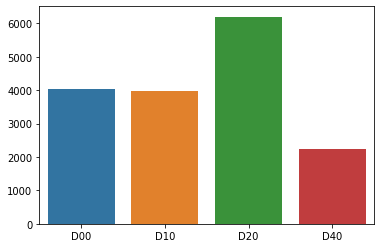

In [23]:
japan_damage_counts = collections.Counter(japan_damage_count)
damage_types = ['D00','D10','D20','D40']
final_damage_counts_japan = []
for damage in damage_types:
  final_damage_counts_japan.append(japan_damage_counts[damage])
sns.barplot(damage_types,final_damage_counts_japan)

<h2> Observations </h2>
<ol>
<li> From above plot, damage type with D20 category i.e alligator cracking is most common on Japan roads. </li>
<li> And categories D00 and D10 are equally distributed for Japan images. </li>
<li> In Japan, roads are  very much less damaged from pothole as compared to alligator cracking. </li>


<h3> 1.1.3 Road Damage Analysis for Czech </h3>

In [25]:
czech_filenames = [file for file in os.listdir(os.getcwd() + '/Czech/annotations/xmls')]
# code for getting count of damages in given Czech dataset from xml files
czech_damage_count = []
for file in tqdm(czech_filenames):
  xmlfile = open(base + '/Czech/annotations/xmls/' + file)
  tree = ElementTree.parse(xmlfile)
  root = tree.getroot()
  for ob in root.iter('object'):
    damagetype = ob.find('name').text
    czech_damage_count.append(damagetype)


<h4> 1.1.3.1  Total no of files for Czech </h4>

In [26]:
print('Image files for Czech',len(czech_filenames))
print('Total count of damage for Czech',len(czech_damage_count))

Image files for Czech 2829
Total count of damage for Czech 1745


<h4> 1.1.3.2  Bar plots for analysing distribution of damage types for czech </h4>

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


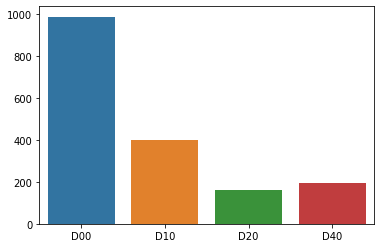

In [27]:
czech_damage_counts = collections.Counter(czech_damage_count)
damage_types = ['D00','D10','D20','D40']

final_damage_counts_czech = []
for damage in damage_types:
  final_damage_counts_czech.append(czech_damage_counts[damage])
sns.barplot(damage_types,final_damage_counts_czech)

<h2> Observations </h2>
<ol>
<li> In czech, most road damages are of D00 categories i.e longitudinal cracks. </li>
<li> Followed by D10(Transverse Crack) and potholes(D40) </li>
<li> Road damages with alligator cracks are very less in Czech as compared to other types of road damages. </li>


<h2> 1.2 Image and its ground truth analysis </h2>

<h3> 1.2.1 India Images </h3>

In [109]:
def draw_images(image_path,country='Japan'):
  ''' drawing bounding boxes in a image from xml files for visualizing ground truth '''
  damage_types = ['D00','D10','D20','D40'] #considering only 4 categories of damage types for this problem
  image = cv2.imread(image_path)
  path = image_path.split('/')[-1].split('.')[0] # getting .xml file name from path
  
  xmlfile = open(os.getcwd()+ '/' + country + '/annotations/xmls/'+ path + '.xml')
  tree = ElementTree.parse(xmlfile)
  root = tree.getroot()
  
  for obj in root.iter('object'):
    class_name = obj.find('name').text
    if class_name not in damage_types:
      continue
    box = obj.find('bndbox')
    xmin = int(box.find('xmin').text)
    xmax = int(box.find('xmax').text)
    ymin = int(box.find('ymin').text)
    ymax = int(box.find('ymax').text)
    cv2.putText(image,class_name,(xmin,ymin),cv2.FONT_HERSHEY_SIMPLEX,1,(255,0,0),2)
    cv2.rectangle(image,(xmin,ymin),(xmax,ymax),(255,0,0),3)
  return image

In [115]:
files = os.listdir(os.getcwd()+'/India/images/')
file_path = [os.path.join(os.getcwd()+'/India/images/',filename) for filename in files]
random.shuffle(file_path) # shuffling filenames

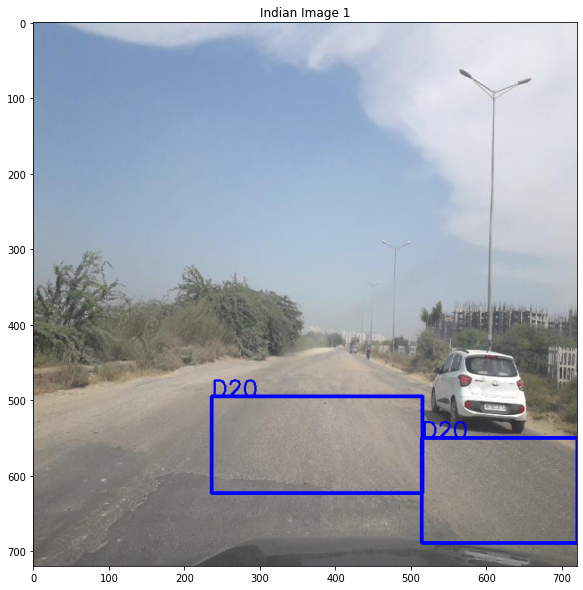

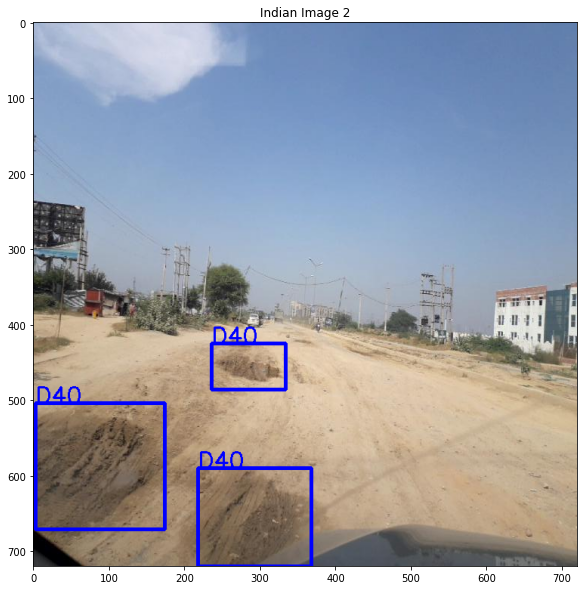

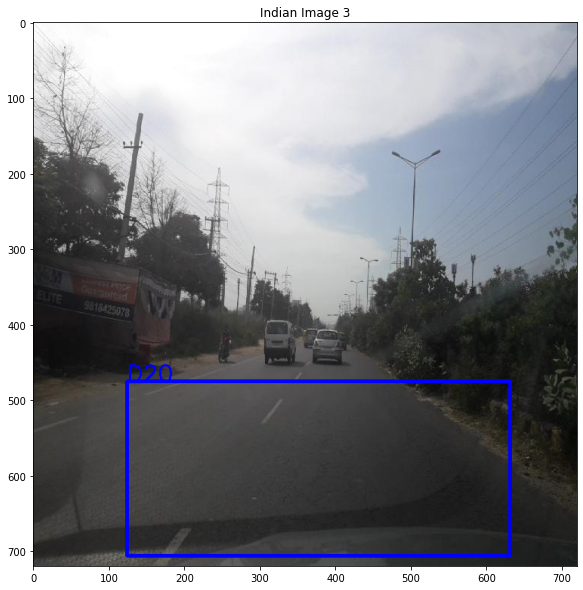

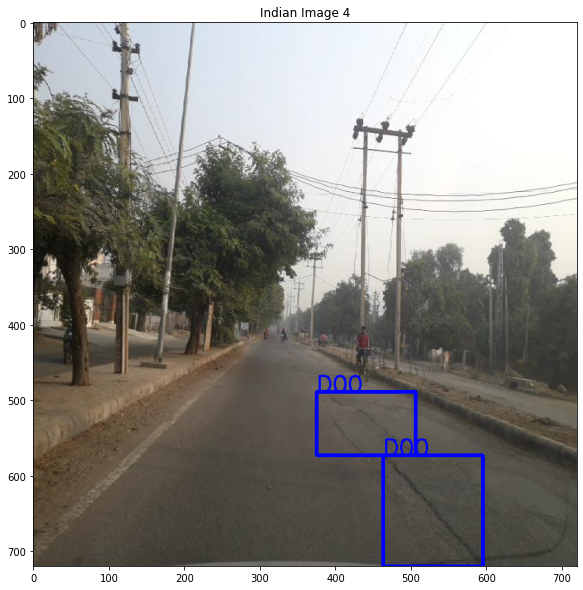

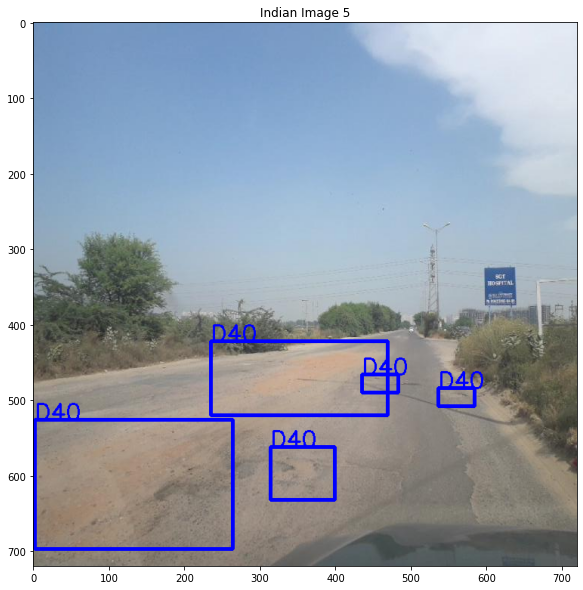

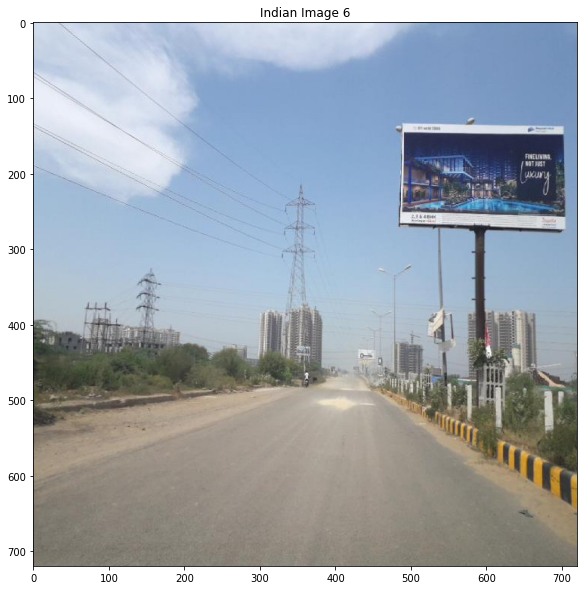

In [116]:

 
for num,image_path in enumerate(file_path):
  image = draw_images(image_path,'India')
  plt.figure(figsize=(10,10))
  plt.subplot(111)
  plt.title('Indian Image ' + str(num + 1))
  plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
  if num == 5:
    break

<h3> Observations </h3>
<ol>
<li> Image 1 and 3 has road damage of D20 type i.e alligator cracks </li>
<li> Image 2 road has road damage of  D40 type  i.e potholes </li>
<li> Image 4 road has road damage of D00 type i.e longitudinal cracks </li>
<li> Image 5 road has multiple road damages  of D40 type i.e potholes </li>
<li> Image 6 road has no road damages </li>
</ol>


<h3> 1.2.2 Japan </h3>

In [105]:
files = os.listdir(os.getcwd()+'/Japan/images/')
file_path = [os.path.join(os.getcwd()+'/Japan/images/',filename) for filename in files]
random.shuffle(file_path) # shuffling filenames

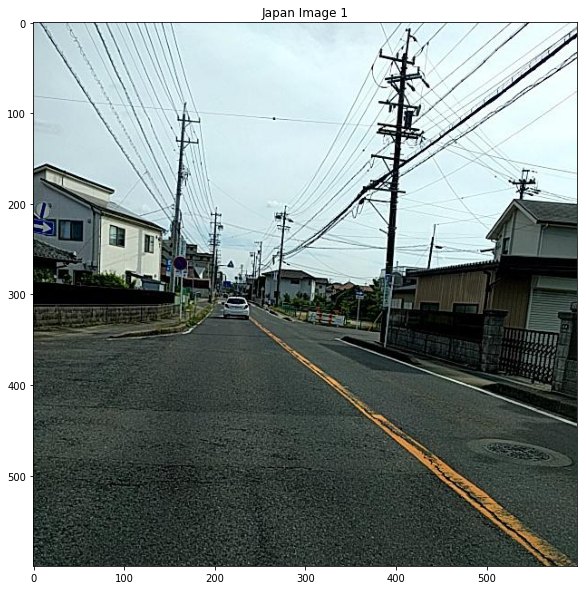

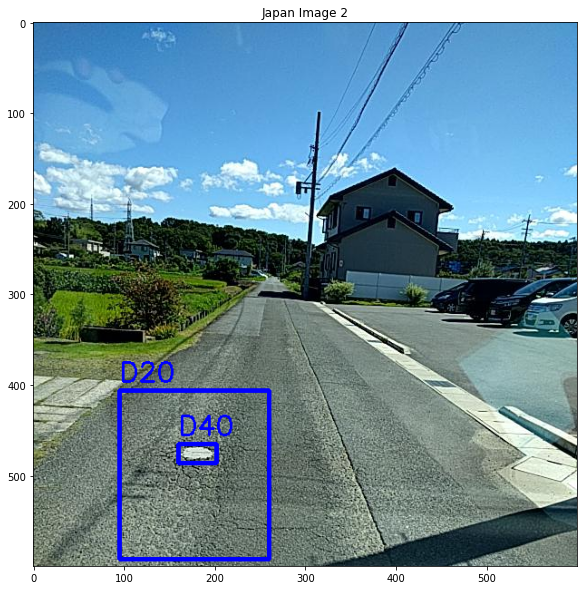

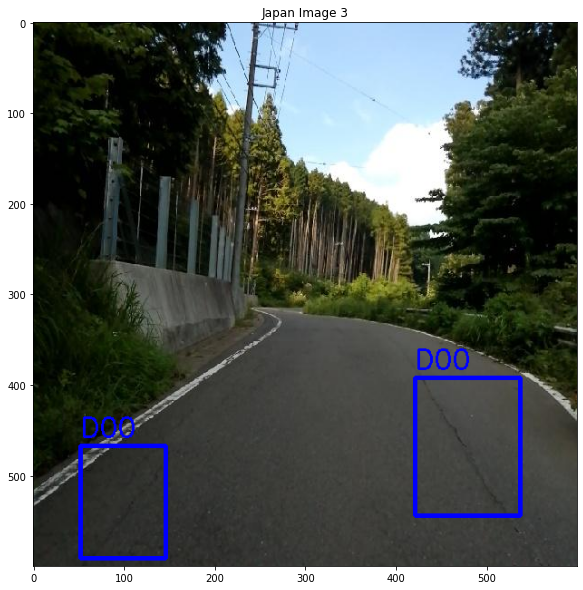

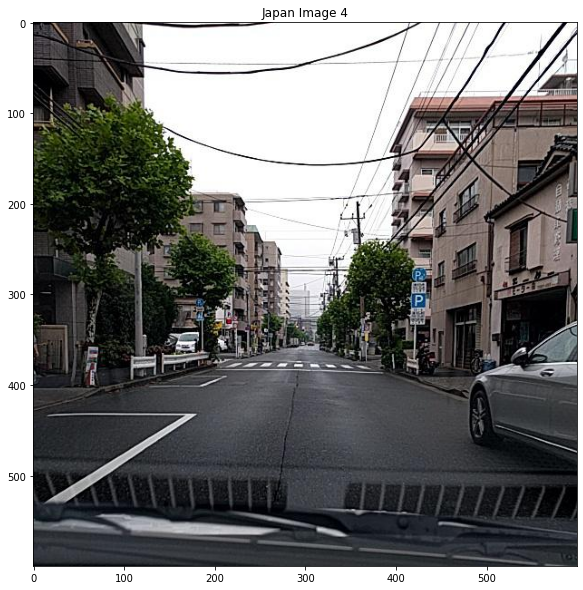

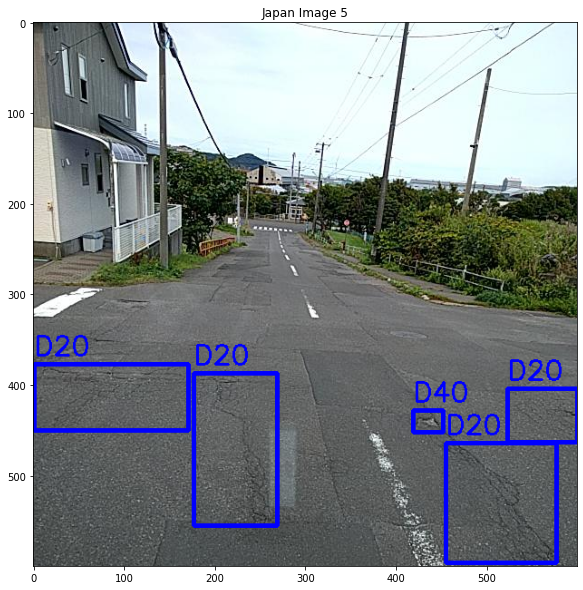

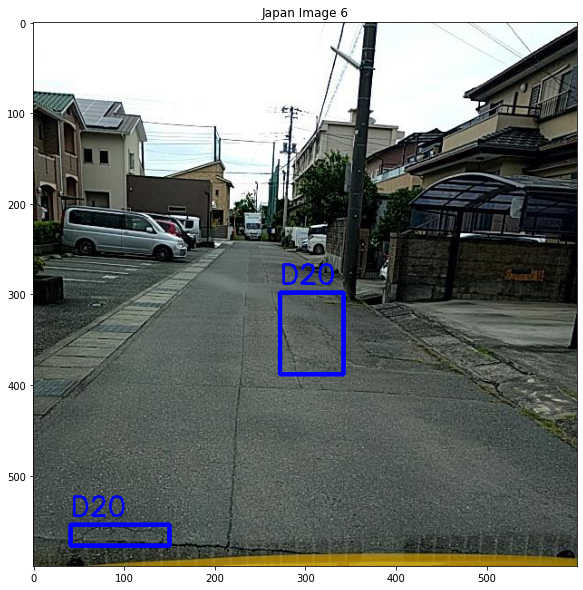

In [106]:

for num,image_path in enumerate(file_path):
  image = draw_images(image_path,'Japan')
  plt.figure(figsize=(10,10))
  plt.subplot(111)
  plt.title('Japan Image ' + str(num + 1))
  plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
  if num == 5:
    break

<h3> Observations </h3>
<ol>
<li> Image 2 for japan has 2 road damages of category D20 and D40 i.e alligator and potholes </li>
<li> Image 3 has 2 road damages of D00 category </li>
<li> Image 6 has also 2 road damages of D20 category </li>
<li> Image 5 has 5 road damages of D20 and D40 types i.e(alligator cracks and potholes) </li>
<li> And Image 1 and 4 has no road damages </li>

<h3>1.2.3 Czech  </h3>

In [107]:
files = os.listdir(os.getcwd()+'/Czech/images/')
file_path = [os.path.join(os.getcwd()+'/Czech/images/',filename) for filename in files]
random.shuffle(file_path) # shuffling filenames

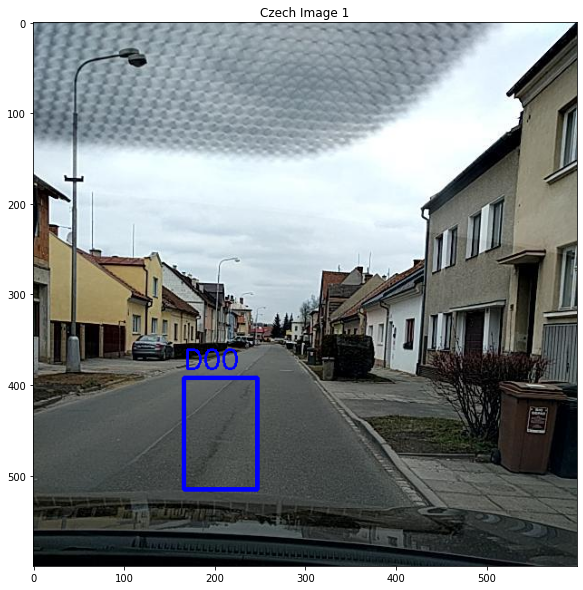

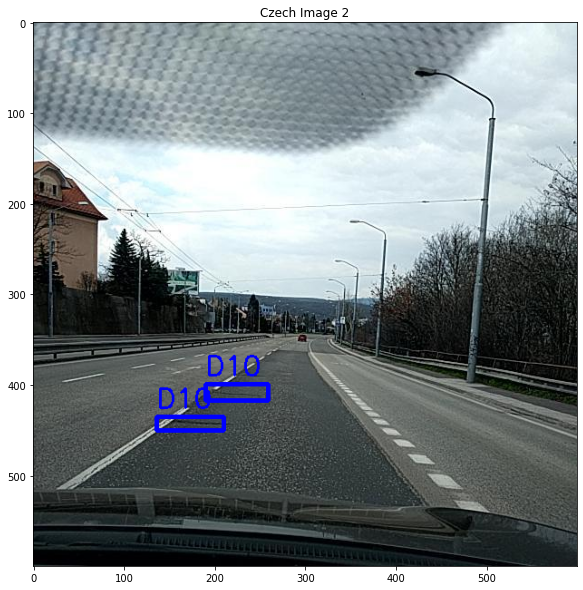

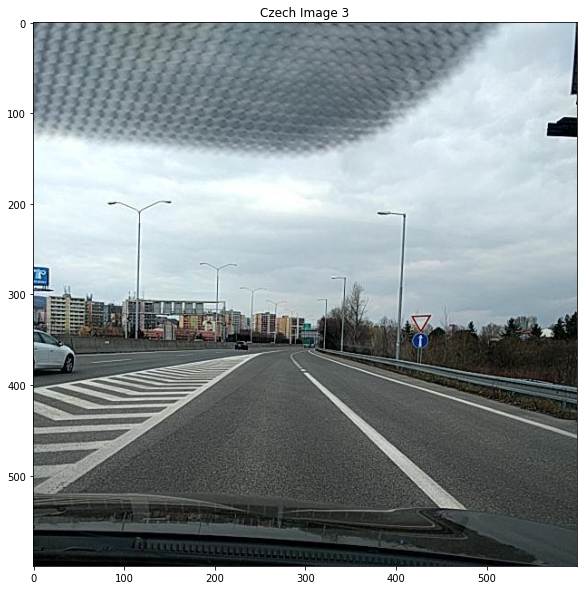

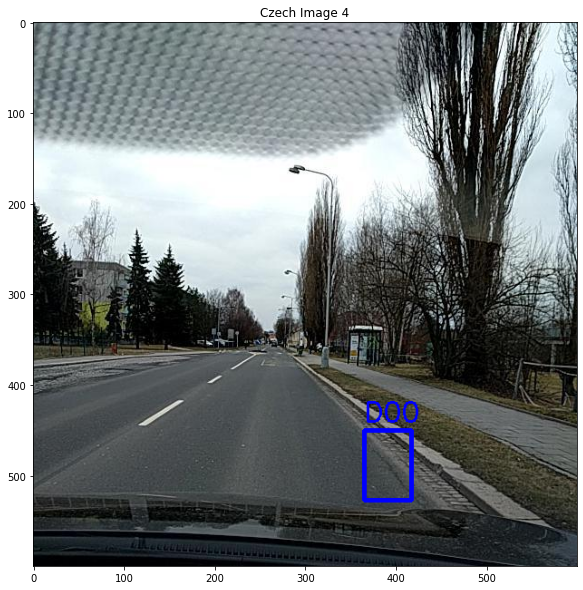

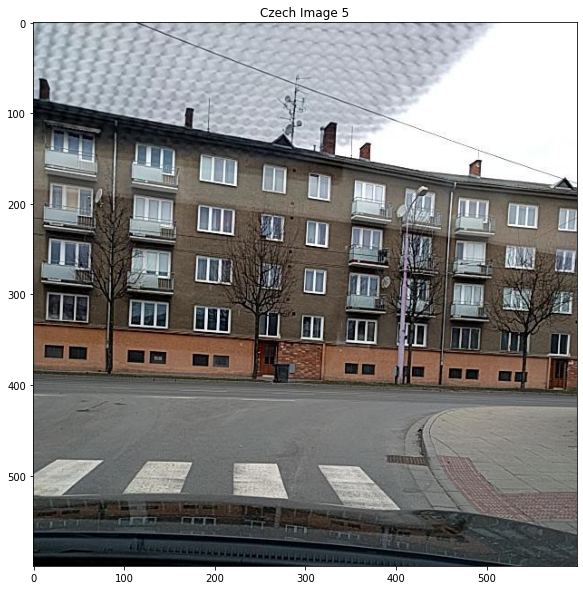

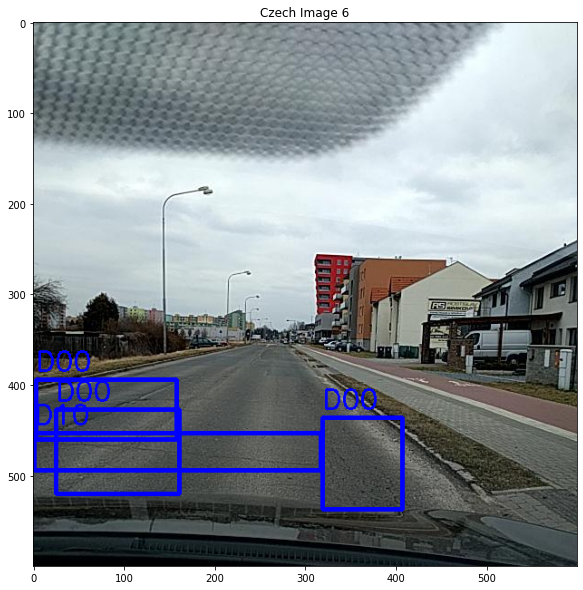

In [108]:

for num,image_path in enumerate(file_path):
  image = draw_images(image_path,'Czech')
  plt.figure(figsize=(10,10))
  plt.subplot(111)
  plt.title('Czech Image ' + str(num + 1))
  plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
  if num == 5:
    break

<h3> Observations </h3>
<ol>
<li> Image 1 for czech has 1 road damage of D00 type i.e longitudinal cracks </li>
<li> Image 2 has 2 road damages of D10 type (transverse cracks) </li>
<li> Image 4 has also 1 road damages of D00 type (longitudinal cracks)</li>
<li> Image 6 has 4 road damages of D00 and D10 types i.e(longitudinal cracks and transverse cracks) </li>
<li> And Image 3 and 5 has no road damages </li>